In [1]:
"""
Landon Buell
Kevin Short
PHYS 799 - B.S. Thesis
22 Sept 2020
"""

        #### IMPORTS ####

import numpy as np
import matplotlib.pyplot as plt

In [4]:
def PlotActivation (X,Y,namesave):
    """ Plot function X,Y"""
    plt.figure(figsize=(24,8))
    plt.xlabel("Input \t $\\vec{z}^{(l)}$",size=60,weight='bold')
    plt.ylabel("Output \t $\\vec{x}^{(l)}$",size=60,weight='bold')
    
    plt.plot(X,Y,'-',color="blue",linewidth=4)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    plt.hlines(0,-100,+100,color='black')
    plt.vlines(0,-10,+100,color='black')
    
    plt.grid()
    plt.tight_layout()
    plt.savefig(namesave+".png")
    plt.show()

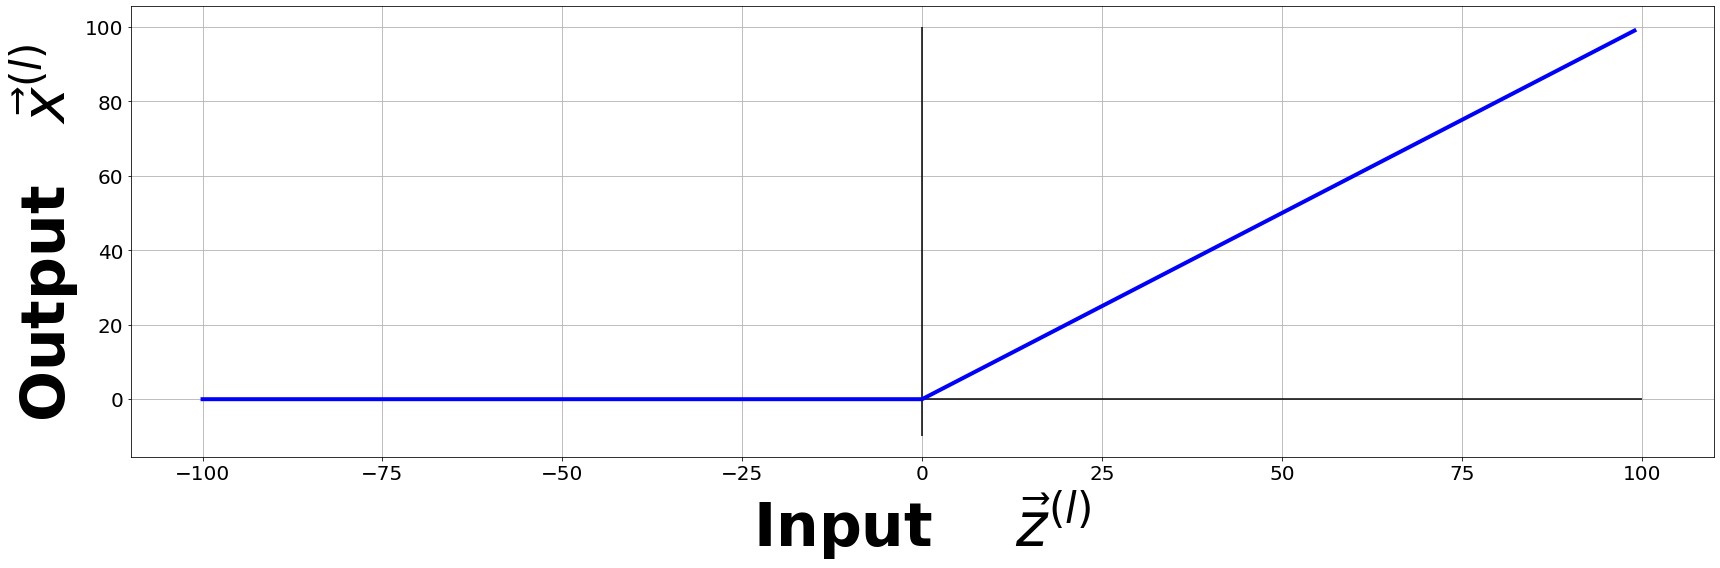

In [7]:
def ReLU (X):
    """ Compute element-wise ReLU(X) """
    return np.array([np.max([0,x]) for x in X])

x1 = np.arange(-100,+100)
y1 = ReLU(x1)

PlotActivation(x1,y1,"RectifiedLinearUnit")

In [19]:
def PlotObjective (X,Y,namesave):
    """ Plot function X,Y"""
    plt.figure(figsize=(24,8))
    plt.xlabel("Prediction : $y^* \in [0,1]$",size=60,weight='bold')
    plt.ylabel("Cost Value",size=60,weight='bold')
    
    plt.plot(X,Y,'-',color="purple",linewidth=4)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    plt.hlines(0,0,1,color='black')
    plt.vlines(0,0,5,color='black')
    
    plt.grid()
    plt.tight_layout()
    plt.savefig(namesave+".png")
    plt.show()

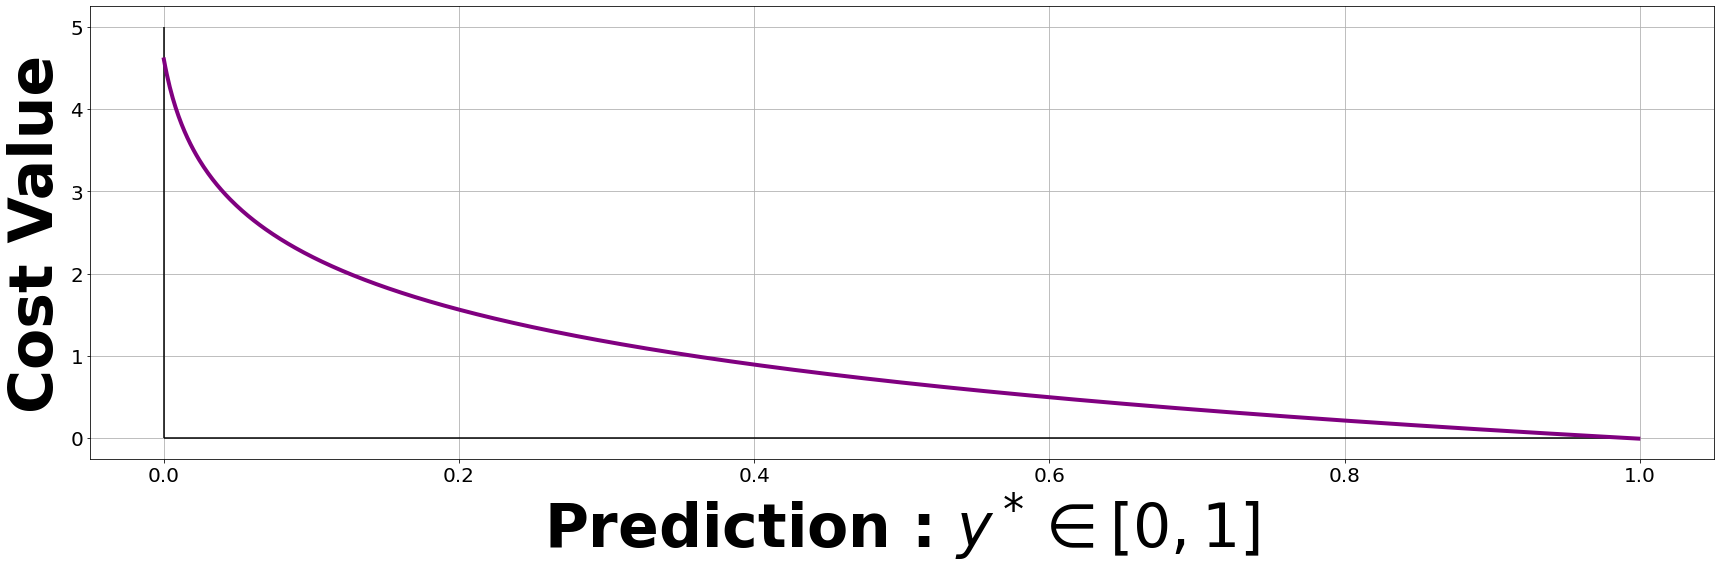

In [20]:
def CategoricalCrossEntropy(X):
    """ Compute Categorical Cross entropy """
    delta = 0.01
    return -np.log(X + delta)

x2 = np.arange(0,1,0.001)
y2 = CategoricalCrossEntropy(x2)

PlotObjective(x2,y2,"CXELoss")

In [38]:
def PlotWaveform (X,Y,namesave):
    """ Plot function X,Y"""
    plt.figure(figsize=(24,8))
    plt.xlabel("Sample Index",size=60,weight='bold')
    plt.ylabel("Amplitude",size=60,weight='bold')
    
    plt.plot(X,Y,'-',color="blue",linewidth=4)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    plt.grid()
    plt.tight_layout()
    plt.savefig(namesave+".png")
    plt.show()

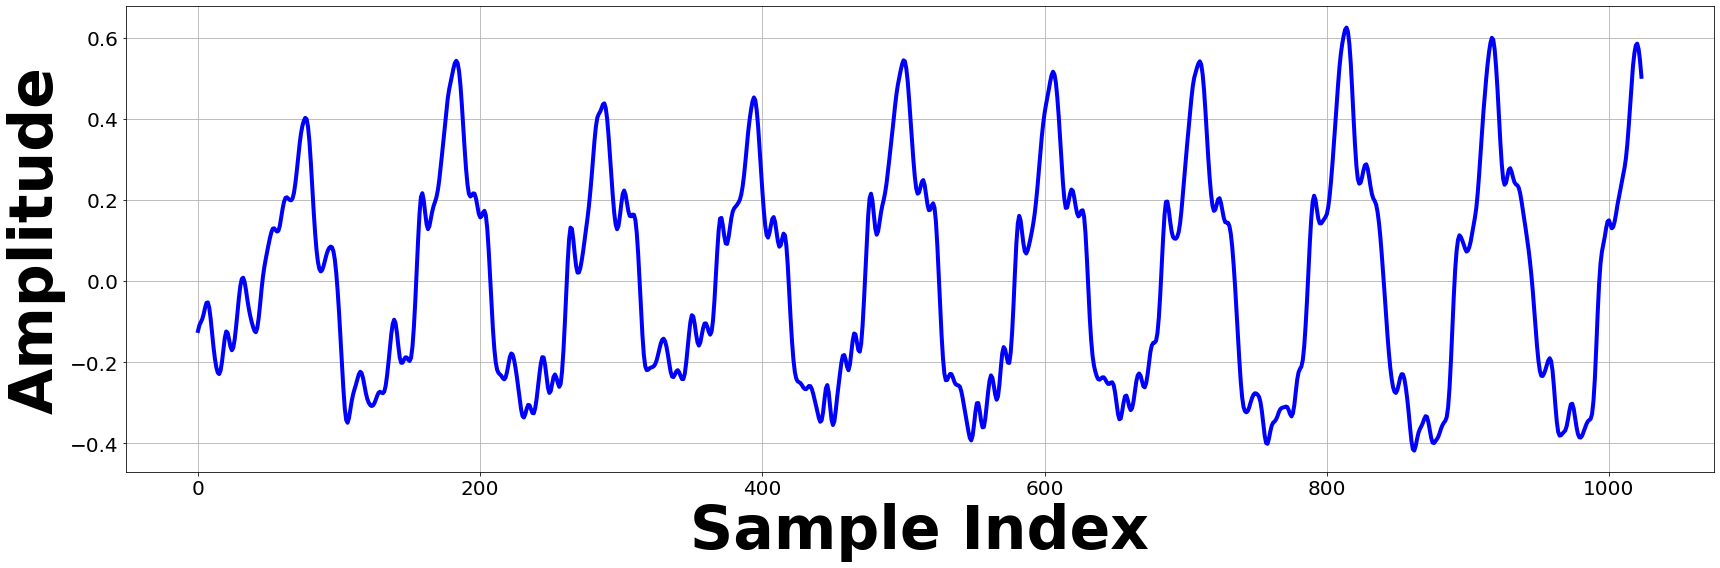

In [39]:
import scipy.io.wavfile as sciowav

wavFile = "Violin.arco.sulG.A4.L.wav"
rate,waveform = sciowav.read(wavFile)
waveform = waveform / np.max(np.abs(waveform))
#t0 = np.arange(len(waveform))

st = 2**12
dt = 1024

frame = waveform[st:st+dt]
t1 = np.arange(dt)

PlotWaveform(t1,frame,"AnalysisFrame")


In [40]:
def PlotWindow (X,Y1,Y2,namesave):
    """ Plot function X,Y"""
    plt.figure(figsize=(24,8))
    plt.xlabel("Sample Index",size=60,weight='bold')
    plt.ylabel("Amplitude",size=60,weight='bold')
    
    plt.plot(X,Y1,'-',color="blue",linewidth=4,label="Waveform")
    plt.plot(X,Y2,"--",color="green",linewidth=4,label="Window")
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    plt.legend(fontsize=30)
    plt.grid()
    plt.tight_layout()
    plt.savefig(namesave+".png")
    plt.show()

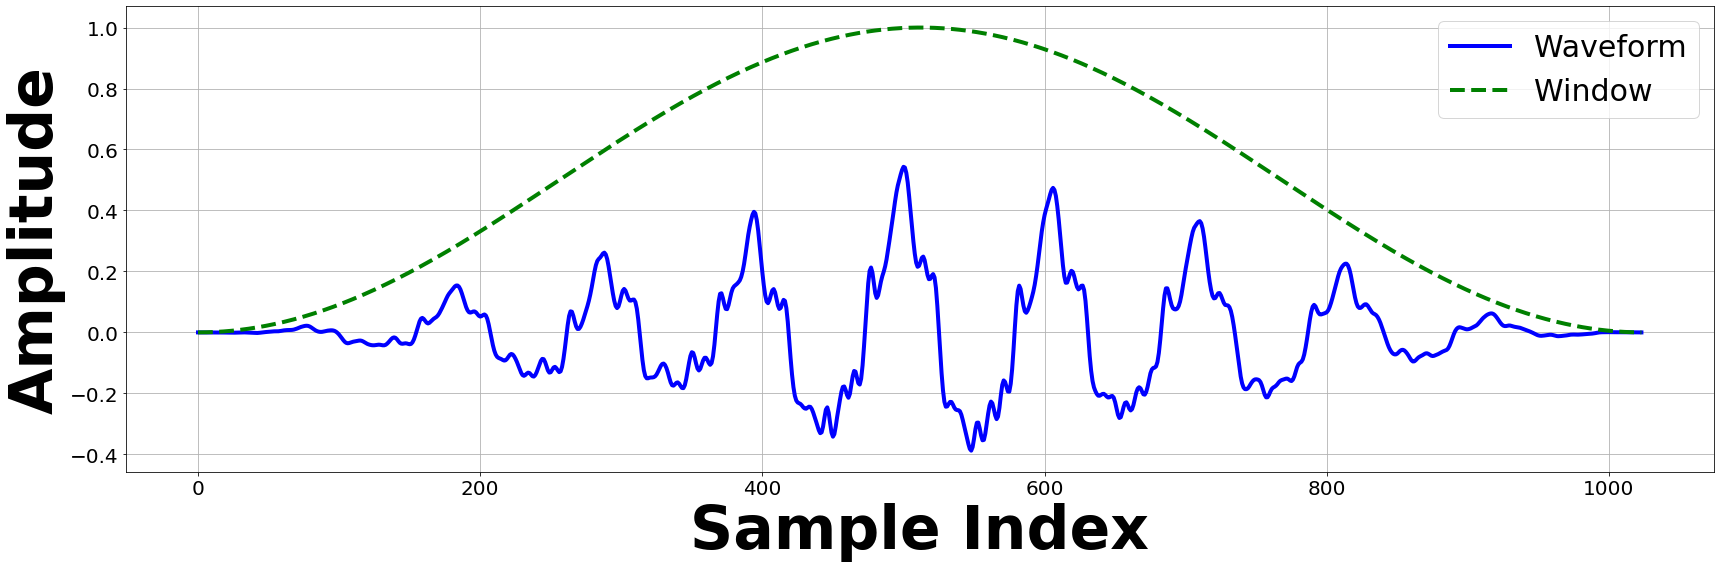

In [41]:
import scipy.signal as signal

hannWindow = signal.hann(dt,sym=False)
newFrame = frame * hannWindow

PlotWindow(t1,newFrame,hannWindow,"WindowedFrame")
